# Dependencies and files

## Install dependencies

## Imports

In [2]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [3]:
de_dir_path = '../results/DE/mammals/ANOVA_zscore/'

In [4]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [5]:
os.listdir(de_dir_path)

['anova_zscore_human_sig_genes.csv',
 'anova_zscore_mamm.csv',
 'cluster_spectr_anova_6.csv',
 'cluster_spectr_anova_7.csv',
 'cluster_spectr_anova_8.csv',
 'cluster_spectr_anova_9.csv',
 'cluster_spectr_hs_6.csv',
 'cluster_spectr_hs_7.csv',
 'cluster_spectr_hs_8.csv',
 'cluster_spectr_hs_9.csv',
 'desktop.ini',
 'human_specific_genes_6.csv',
 'ssGSEA_human_sig_genes.csv',
 'ttest_human_sig_genes.csv',
 'ttest_sign_genes.csv',
 'ttest_zscore_human_monkeys.csv',
 'ttest_zscore_mamm.csv']

### DE results

In [6]:
anova_res = pd.read_csv(de_dir_path + 'anova_zscore_mamm.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
NOC2L     6.384890  12.0  0.813337  0.635908   0.716158
HES4     15.058197  12.0  1.878258  0.052758   0.121203
AGRN     15.583493  12.0  3.171660  0.001230   0.007732
SDF4     14.214074  12.0  1.574430  0.120231   0.220228
B3GALT6  12.113356  12.0  1.676662  0.091658   0.181660

In [7]:
ttest_res = pd.read_csv(de_dir_path + 'ttest_zscore_mamm.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.334627  0.749294   0.871771
1  ANKRD65    L1  human  chimp -0.558470  0.596733   0.772328
2  TMEM240    L1  human  chimp  2.100247  0.080450   0.274743
3     NADK    L1  human  chimp -5.641027  0.001330   0.038326
4     GNB1    L1  human  chimp  0.164405  0.874811   0.941712

In [8]:
n_clusters = 7
anova_labels = pd.read_csv(de_dir_path + f'cluster_spectr_anova_{n_clusters}.csv', index_col=0)['0'].sort_values()
anova_labels = anova_labels + 1
anova_labels.name = 'ANOVA_labels'

In [9]:
hum_spec_onehot = pd.read_csv('results/hum_spec_onehot.csv', index_col=0)
hum_spec_onehot

HES4  AGRN  SDF4  B3GALT6  SCNN1D  PUSL1  INTS11  AURKAIP1  MRPL20  \
L1     0     0     0        0       1      0       0         0       1   
L2     0     0     0        1       1      0       0         0       0   
L3     0     0     0        1       1      0       0         1       0   
L4     1     0     0        0       0      0       0         0       0   
L5     1     1     0        1       1      0       0         0       1   
L6     1     1     1        1       1      1       0         0       1   
WM     0     0     0        1       0      0       1         0       0   

    ANKRD65  ...  CFAP410  TRPM2  UBE2G2  PTTG1IP  FAM207A  ADARB1  POFUT2  \
L1        1  ...        1      0       0        0        0       1       0   
L2        0  ...        0      1       0        0        0       0       1   
L3        1  ...        0      0       1        0        0       0       1   
L4        1  ...        0      0       0        0        0       0       0   
L5        0  ...        0      0       0        0        0       0       0   
L6        0  ...        0      0       0        1        0       0       0   
WM        0  ...        0      0       0        0        1       0       1   

    COL18A1  YBEY  PRMT2  
L1        0     1      0  
L2        1     0      0  
L3        1     0      0  
L4        0     0      1  
L5        0     0      0  
L6        0     0      0  
WM        0     0      0  

[7 rows x 6194 columns]

## Load normalized pseudobulks

In [10]:
pb_dir_path = '../data/pseudobulks/'

In [11]:
os.listdir(pb_dir_path)

['annotation_chimp.csv',
 'annotation_human.csv',
 'annotation_macaque.csv',
 'annotation_spatial_libd_human.csv',
 'expression_chimp.csv',
 'expression_human.csv',
 'expression_macaque.csv',
 'expression_mean_chimp.csv',
 'expression_mean_human.csv',
 'expression_mean_macaque.csv',
 'expression_mean_spatial_libd_human.csv',
 'expression_spatial_libd_human.csv',
 'expression_sum_chimp.csv',
 'expression_sum_human.csv',
 'expression_sum_macaque.csv',
 'expression_sum_spatial_libd_human.csv',
 'gene_sample_mean_chimp.csv',
 'gene_sample_mean_human.csv',
 'gene_sample_mean_macaque.csv',
 'gene_sample_mean_spatial_libd_human.csv',
 'pb_age.h5ad',
 'pb_age_sample_norm.h5ad',
 'pb_age_sample_norm_zscore.h5ad',
 'pb_mamm.h5ad',
 'pb_mamm_filtered.h5ad',
 'pb_mamm_laminar_filtered.h5ad',
 'pb_mamm_laminar_sample_zscore_filtered.h5ad',
 'pb_mamm_sample_norm.h5ad',
 'pb_mamm_sample_norm_filtered.h5ad',
 'pb_mamm_sample_norm_zscore.h5ad',
 'pb_mamm_sample_zscore_filtered.h5ad']

In [12]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mamm_sample_zscore_filtered.h5ad')
adata_pb_norm.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [13]:
adata_pb_norm_mean = sc.read_h5ad(pb_dir_path + 'pb_mamm_sample_norm_filtered.h5ad')
#adata_pb_norm_mean.var = anova_res
adata_pb_norm_mean

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# Z-transform-like normalization

## Calculate differencies

In [14]:
adata_pb_norm[(adata_pb_norm.obs.condition == 'human') & (adata_pb_norm.obs.layer == 'L1')].obs

layer  sample_id condition     lib_size  log_lib_size
L1.human_759    L1  human_759     human  1922.905518      7.561593
L1.human_j12    L1  human_j12     human  2501.380371      7.824598
L1.human_j3     L1   human_j3     human  3437.235840      8.142423
L1.human_j4     L1   human_j4     human  3236.211426      8.082159
L1.human_j6     L1   human_j6     human  1907.776001      7.553693

In [15]:
# calculate average expr for each layer of each specie
mean_norm_expr_dict = dict()
for specie in ['human', 'chimp', 'macaque']:
    mean_norm_expr = pd.DataFrame(index=adata_pb_norm.var_names, columns=layers)
    for layer in layers:
        mean_norm_expr[layer] = np.array(adata_pb_norm[(adata_pb_norm.obs.condition == specie) &
                                                       (adata_pb_norm.obs.layer == layer)].X.mean(axis=0))
    mean_norm_expr_dict[specie] = mean_norm_expr

In [16]:
# calculate diff
human_chimp_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['chimp']
human_macaque_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['macaque']
chimp_macaque_diff = mean_norm_expr_dict['chimp'] - mean_norm_expr_dict['macaque']

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace': 0.3})

sns.histplot(human_chimp_diff, bins=30, element="step", ax=ax[0])
ax[0].set_title('human vs chimp diff')

sns.histplot(human_macaque_diff, bins=30, element="step", ax=ax[1])
ax[1].set_title('human vs macaque diff')

sns.histplot(chimp_macaque_diff, bins=30, element="step", ax=ax[2])
ax[2].set_title('chimp vs macaque diff')

Text(0.5, 1.0, 'chimp vs macaque diff')

## Calculate the ratio

Load human vs chimp and human vs macaque differecies to one dataframe

In [18]:
hum_stack = human_chimp_diff.stack().to_frame().swaplevel(1, 0)
hum_stack.columns = ['human_chimp_diff']
hum_stack['human_macaque_diff'] = human_macaque_diff.stack().swaplevel(1, 0)
hum_stack['ΔHC - ΔHM'] = hum_stack['human_chimp_diff'] - hum_stack['human_macaque_diff']
hum_stack.head()

human_chimp_diff  human_macaque_diff  ΔHC - ΔHM
L1 NOC2L          0.053880            0.164449  -0.110569
L2 NOC2L         -0.359535           -0.688927   0.329392
L3 NOC2L          0.052210           -0.244715   0.296924
L4 NOC2L         -0.199553           -0.042363  -0.157190
L5 NOC2L          0.756613           -0.218019   0.974632

Add t-test results for ANOVA significant genes

In [19]:
hum_stack['hc_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'chimp')].set_index(['layer', 'gene']).p_val_adj
hum_stack['hm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack['cm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'chimp') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack.head()

#hum_stack['mult_diff'] = hum_stack['human_chimp_diff'] * hum_stack['human_macaque_diff']
#hum_spec_stack = hum_stack[hum_stack.mult_diff > 0].sort_index()
#hum_spec_stack.head()

human_chimp_diff  human_macaque_diff  ΔHC - ΔHM  hc_p_val_adj  \
L1 NOC2L          0.053880            0.164449  -0.110569           NaN   
L2 NOC2L         -0.359535           -0.688927   0.329392           NaN   
L3 NOC2L          0.052210           -0.244715   0.296924           NaN   
L4 NOC2L         -0.199553           -0.042363  -0.157190           NaN   
L5 NOC2L          0.756613           -0.218019   0.974632           NaN   

          hm_p_val_adj  cm_p_val_adj  
L1 NOC2L           NaN           NaN  
L2 NOC2L           NaN           NaN  
L3 NOC2L           NaN           NaN  
L4 NOC2L           NaN           NaN  
L5 NOC2L           NaN           NaN

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(7, 14))

data_to_plot = human_chimp_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[0])
ax[0].vlines(0, ymin=0, ymax=1000, colors='black', linestyles='dashed')
ax[0].grid(False)
ax[0].set_xlabel('$\Delta HC - \Delta HM$', fontsize=15)
ax[0].set_ylabel('Number of genes', fontsize=15)

data_to_plot = chimp_macaque_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[1])
ax[1].vlines(0, ymin=0, ymax=1200, colors='black', linestyles='dashed')
ax[1].grid(False)
ax[1].set_xlabel('$\Delta CM - \Delta HM$', fontsize=15)
ax[1].set_ylabel('Number of genes', fontsize=15)

data_to_plot = human_chimp_diff - chimp_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[2])
ax[2].vlines(0, ymin=0, ymax=700, colors='black', linestyles='dashed')
ax[2].grid(False)
ax[2].set_xlabel('$\Delta HC - \Delta CM$', fontsize=15)
ax[2].set_ylabel('Number of genes', fontsize=15)

Text(0, 0.5, 'Number of genes')

## Filter specie-specific profiles

### Let's explore

In [21]:
#human_chimp_diff, human_macaque_diff, chimp_macaque_diff

In [22]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

(0.0, 10.0)

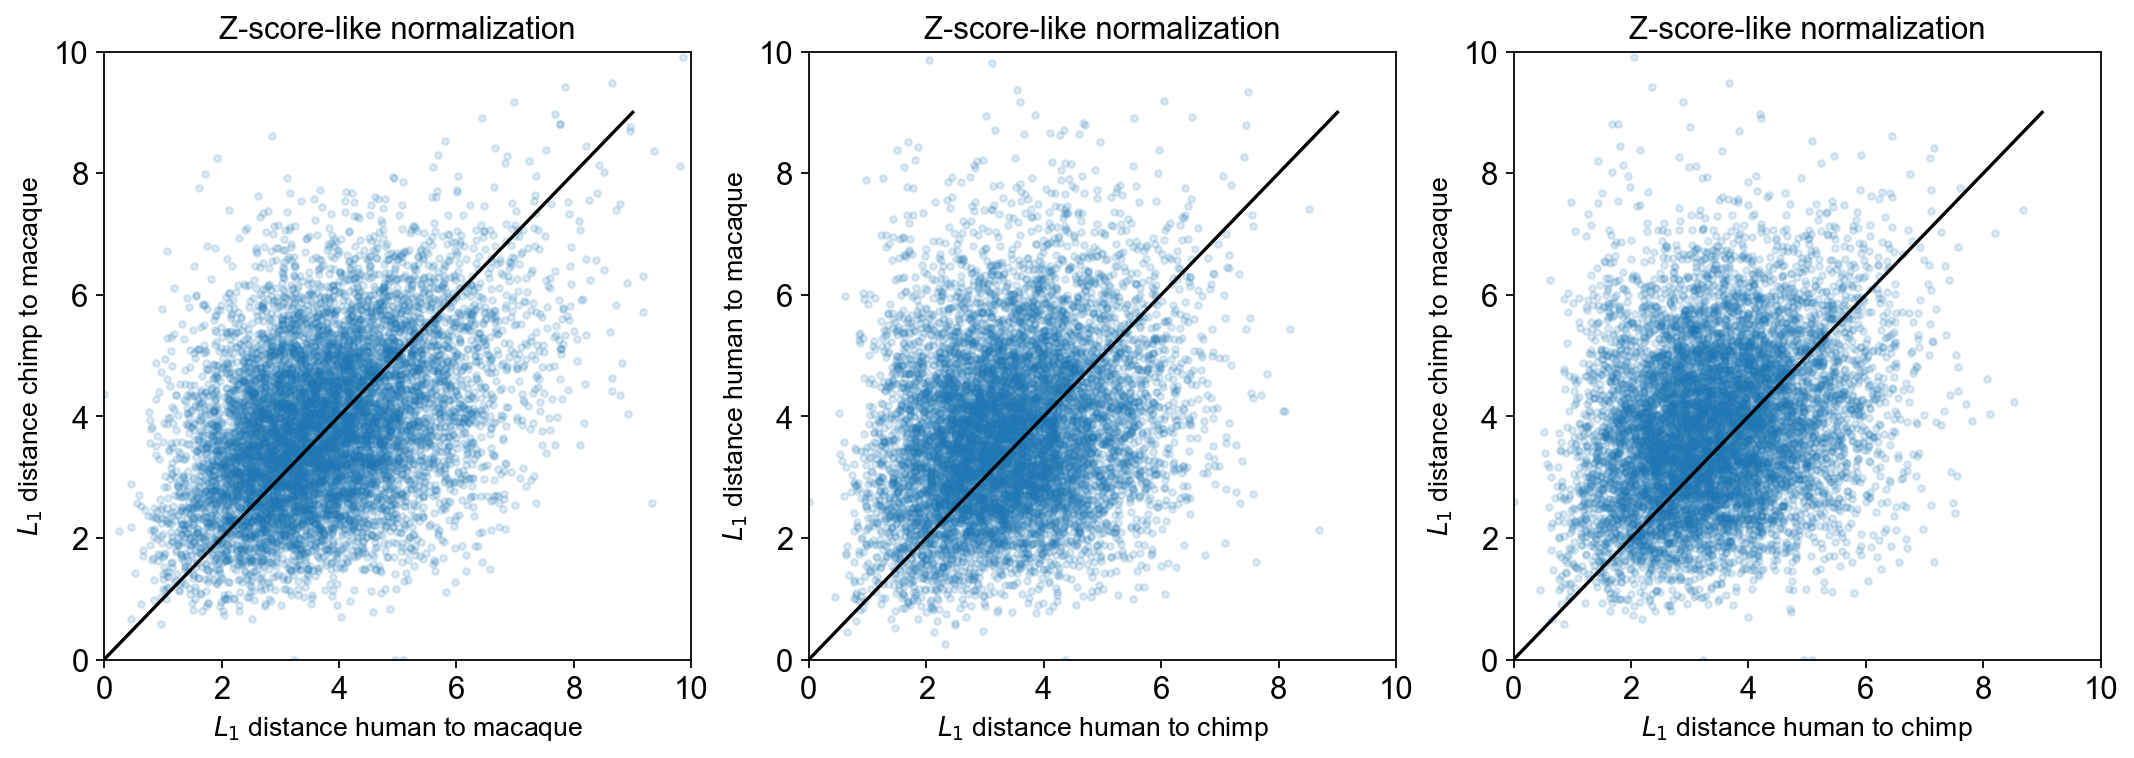

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(hm_l1, cm_l1, '.', alpha=0.15)
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 10)

ax[1].plot(hc_l1, hm_l1, '.', alpha=0.15)
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Z-score-like normalization')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 10)

ax[2].plot(hc_l1, cm_l1, '.', alpha=0.15)
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Z-score-like normalization')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 10)
ax[2].set_ylim(0, 10)

In [24]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(hm_l1, cm_l1, alpha=0.5, c=hc_l1, cmap='coolwarm')
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 10)

ax[1].scatter(hc_l1, hm_l1, alpha=0.5, c=cm_l1, cmap='coolwarm')
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Z-score-like normalization')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 10)

ax[2].scatter(hc_l1, cm_l1, alpha=0.5, c=hm_l1, cmap='coolwarm')
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Z-score-like normalization')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 10)
ax[2].set_ylim(0, 10)

(0.0, 10.0)

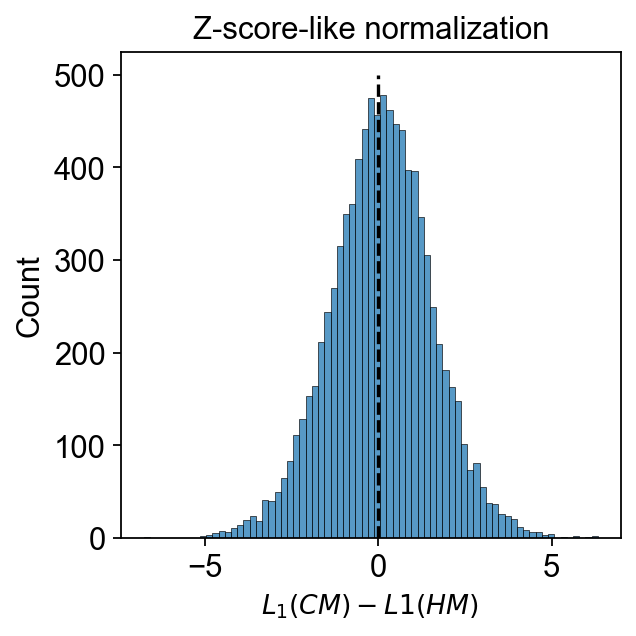

In [26]:
sns.histplot(cm_l1 - hm_l1)
plt.vlines(0, ymin=0, ymax=500, colors='black', linestyles='dashed')
plt.title('Z-score-like normalization')
plt.xlabel('$L_1(CM) - L1(HM)$ ', fontsize=12)
plt.grid(False)

In [27]:
((cm_l1 - hm_l1) < 0).sum(), ((cm_l1 - hm_l1) > 0).sum()

(4319, 4888)

### Human-specific

Filter genes:
$$
L_1(HM) > L_1(CM)
$$

and

$$
L_1(HC) >= q
$$

In [28]:
quantile = 0.95
quant_value = hc_l1.quantile(quantile)
quant_value

5.615866017176752

Text(0.5, 1.0, '$L_1$ distance human vs chimp')

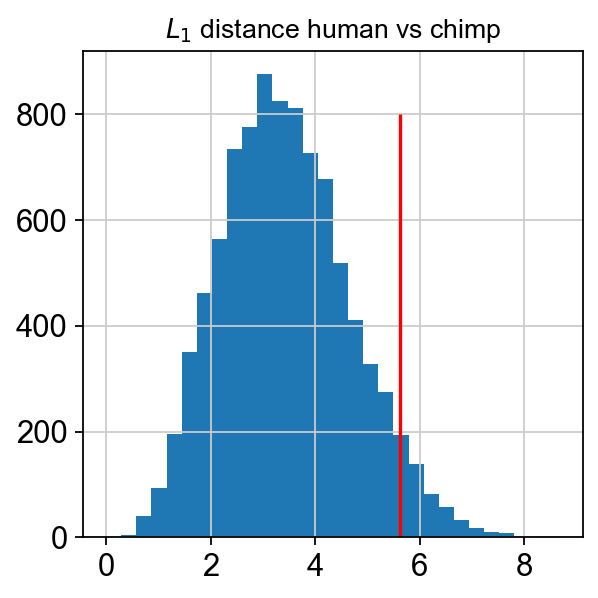

In [29]:
plt.vlines(quant_value, ymin=0, ymax=800,colors='red')
hc_l1.hist(bins=30)
plt.title('$L_1$ distance human vs chimp', fontsize=12)

In [30]:
gene_filter1 = (hm_l1 > cm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [31]:
hs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
hs_genes

Index(['ZCCHC17', 'MAP7D1', 'CITED4', 'DMAP1', 'SH3GLB1', 'HENMT1', 'KHDC4',
       'ABL2', 'XPR1', 'SMG7',
       ...
       'GMFG', 'ETFB', 'ISOC2', 'CACNG2', 'DESI1', 'TSPO', 'KIAA0930', 'NRIP1',
       'NCAM2', 'BRWD1'],
      dtype='object', length=224)

### Chimp-specific

In [32]:
gene_filter1 = (cm_l1 > hm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [33]:
cs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
cs_genes

Index(['USP48', 'FAM76A', 'NKAIN1', 'PTP4A2', 'RIMS3', 'FAF1', 'HSPB11',
       'USP24', 'ALG6', 'AGL',
       ...
       'EMID1', 'PES1', 'CBY1', 'DNAL4', 'CHADL', 'TBC1D22A', 'SHANK3',
       'PAXBP1', 'CRYZL1', 'PSMG1'],
      dtype='object', length=237)

### Macaque-specific

In [34]:
gene_filter1 = (hm_l1 > hc_l1)
gene_filter2 = (cm_l1 >= quant_value)
gene_filter2.sum()

915

In [35]:
ms_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
ms_genes

Index(['TMEM240', 'GNB1', 'TP73', 'CAMTA1', 'TMEM201', 'NMNAT1', 'PGD', 'SRM',
       'NPPA', 'EFHD2',
       ...
       'TXN2', 'TRIOBP', 'NUP50', 'GRIK1', 'TIAM1', 'ETS2', 'GET1', 'PDE9A',
       'NDUFV3', 'RRP1'],
      dtype='object', length=578)

### Compare a number of human-specific vs chimp-specific

In [36]:
qv_list = np.linspace(5, 10)
hs_num = []
cs_num = []
ms_num = []
quant_list = [0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999]
for qv in qv_list:
    #qv = hc_l1.quantile(q)
    # hs
    gene_filter1 = (hm_l1 > cm_l1)
    gene_filter2 = (hc_l1 >= qv)
    hs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # cs
    gene_filter1 = (cm_l1 > hm_l1)
    gene_filter2 = (hc_l1 >= qv)
    cs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # ms
    gene_filter1 = (hm_l1 > hc_l1)
    gene_filter2 = (cm_l1 >= qv)
    ms_num.append(hm_l1[(gene_filter1) & (gene_filter2)].index.size)

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(qv_list, hs_num, 'r-')
ax[0].plot(qv_list, cs_num, '-', c='orange')
ax[0].plot(qv_list, ms_num, '-', c='green')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('Treashold value', fontsize=12)
ax[0].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[0].legend(['human', 'chimp', 'macaque'])
ax[0].grid(False)

ax[1].plot(qv_list, hs_num, 'r-')
ax[1].plot(qv_list, cs_num, '-', c='orange')
ax[1].set_title('Z-score-like normalization')
ax[1].set_xlabel('Treashold value', fontsize=12)
ax[1].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[1].legend(['human', 'chimp', 'macaque'])
ax[1].grid(False)

In [38]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(qv_list, np.array(hs_num) - np.array(cs_num), '-')
plt.hlines(0, xmin=5, xmax=10, colors='black', linestyles='dashed', alpha=0.7)
plt.title('Z-score-like normalization')
plt.xlabel('Treashold value', fontsize=12)
plt.ylabel('$N_{hs} - N_{cs}$', fontsize=12)
plt.grid(False)

# Normalization on average

## Calculate differencies

In [39]:
adata_pb_norm_mean[(adata_pb_norm_mean.obs.condition == 'human') & (adata_pb_norm_mean.obs.layer == 'L1')].obs

layer  sample_id condition     lib_size  log_lib_size
L1.human_759    L1  human_759     human  1922.905518      7.561593
L1.human_j12    L1  human_j12     human  2501.380371      7.824598
L1.human_j3     L1   human_j3     human  3437.235840      8.142423
L1.human_j4     L1   human_j4     human  3236.211426      8.082159
L1.human_j6     L1   human_j6     human  1907.776001      7.553693

In [40]:
# calculate average expr for each layer of each specie
mean_norm_expr_dict = dict()
for specie in ['human', 'chimp', 'macaque']:
    mean_norm_expr = pd.DataFrame(index=adata_pb_norm_mean.var_names, columns=layers)
    for layer in layers:
        mean_norm_expr[layer] = np.array(adata_pb_norm_mean[(adata_pb_norm_mean.obs.condition == specie) &
                                                       (adata_pb_norm_mean.obs.layer == layer)].X.mean(axis=0))
    mean_norm_expr_dict[specie] = mean_norm_expr

In [41]:
# calculate diff
human_chimp_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['chimp']
human_macaque_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['macaque']
chimp_macaque_diff = mean_norm_expr_dict['chimp'] - mean_norm_expr_dict['macaque']

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace': 0.3})

sns.histplot(human_chimp_diff, bins=30, element="step", ax=ax[0])
ax[0].set_title('human vs chimp diff')

sns.histplot(human_macaque_diff, bins=30, element="step", ax=ax[1])
ax[1].set_title('human vs macaque diff')

sns.histplot(chimp_macaque_diff, bins=30, element="step", ax=ax[2])
ax[2].set_title('chimp vs macaque diff')

Text(0.5, 1.0, 'chimp vs macaque diff')

## Calculate the ratio

Load human vs chimp and human vs macaque differecies to one dataframe

In [43]:
hum_stack = human_chimp_diff.stack().to_frame().swaplevel(1, 0)
hum_stack.columns = ['human_chimp_diff']
hum_stack['human_macaque_diff'] = human_macaque_diff.stack().swaplevel(1, 0)
hum_stack['ΔHC - ΔHM'] = hum_stack['human_chimp_diff'] - hum_stack['human_macaque_diff']
hum_stack.head()

human_chimp_diff  human_macaque_diff  ΔHC - ΔHM
L1 NOC2L          0.005005            0.001646   0.003359
L2 NOC2L         -0.003285           -0.041400   0.038115
L3 NOC2L         -0.008007           -0.035306   0.027299
L4 NOC2L         -0.004902            0.006270  -0.011172
L5 NOC2L          0.060071           -0.012766   0.072837

Add t-test results for ANOVA significant genes

In [44]:
hum_stack['hc_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'chimp')].set_index(['layer', 'gene']).p_val_adj
hum_stack['hm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack['cm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'chimp') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack.head()

#hum_stack['mult_diff'] = hum_stack['human_chimp_diff'] * hum_stack['human_macaque_diff']
#hum_spec_stack = hum_stack[hum_stack.mult_diff > 0].sort_index()
#hum_spec_stack.head()

human_chimp_diff  human_macaque_diff  ΔHC - ΔHM  hc_p_val_adj  \
L1 NOC2L          0.005005            0.001646   0.003359           NaN   
L2 NOC2L         -0.003285           -0.041400   0.038115           NaN   
L3 NOC2L         -0.008007           -0.035306   0.027299           NaN   
L4 NOC2L         -0.004902            0.006270  -0.011172           NaN   
L5 NOC2L          0.060071           -0.012766   0.072837           NaN   

          hm_p_val_adj  cm_p_val_adj  
L1 NOC2L           NaN           NaN  
L2 NOC2L           NaN           NaN  
L3 NOC2L           NaN           NaN  
L4 NOC2L           NaN           NaN  
L5 NOC2L           NaN           NaN

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(7, 14))

data_to_plot = human_chimp_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[0])
ax[0].vlines(0, ymin=0, ymax=1000, colors='black', linestyles='dashed')
ax[0].grid(False)
ax[0].set_xlabel('$\Delta HC - \Delta HM$', fontsize=15)
ax[0].set_ylabel('Number of genes', fontsize=15)

data_to_plot = chimp_macaque_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[1])
ax[1].vlines(0, ymin=0, ymax=1200, colors='black', linestyles='dashed')
ax[1].grid(False)
ax[1].set_xlabel('$\Delta CM - \Delta HM$', fontsize=15)
ax[1].set_ylabel('Number of genes', fontsize=15)

data_to_plot = human_chimp_diff - chimp_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[2])
ax[2].vlines(0, ymin=0, ymax=700, colors='black', linestyles='dashed')
ax[2].grid(False)
ax[2].set_xlabel('$\Delta HC - \Delta CM$', fontsize=15)
ax[2].set_ylabel('Number of genes', fontsize=15)

Text(0, 0.5, 'Number of genes')

## Filter specie-specific profiles

### Let's explore

In [46]:
#human_chimp_diff, human_macaque_diff, chimp_macaque_diff

In [47]:
hc_l1_mean = human_chimp_diff.abs().sum(axis=1)
hm_l1_mean = human_macaque_diff.abs().sum(axis=1)
cm_l1_mean = chimp_macaque_diff.abs().sum(axis=1)

(0.0, 10.0)

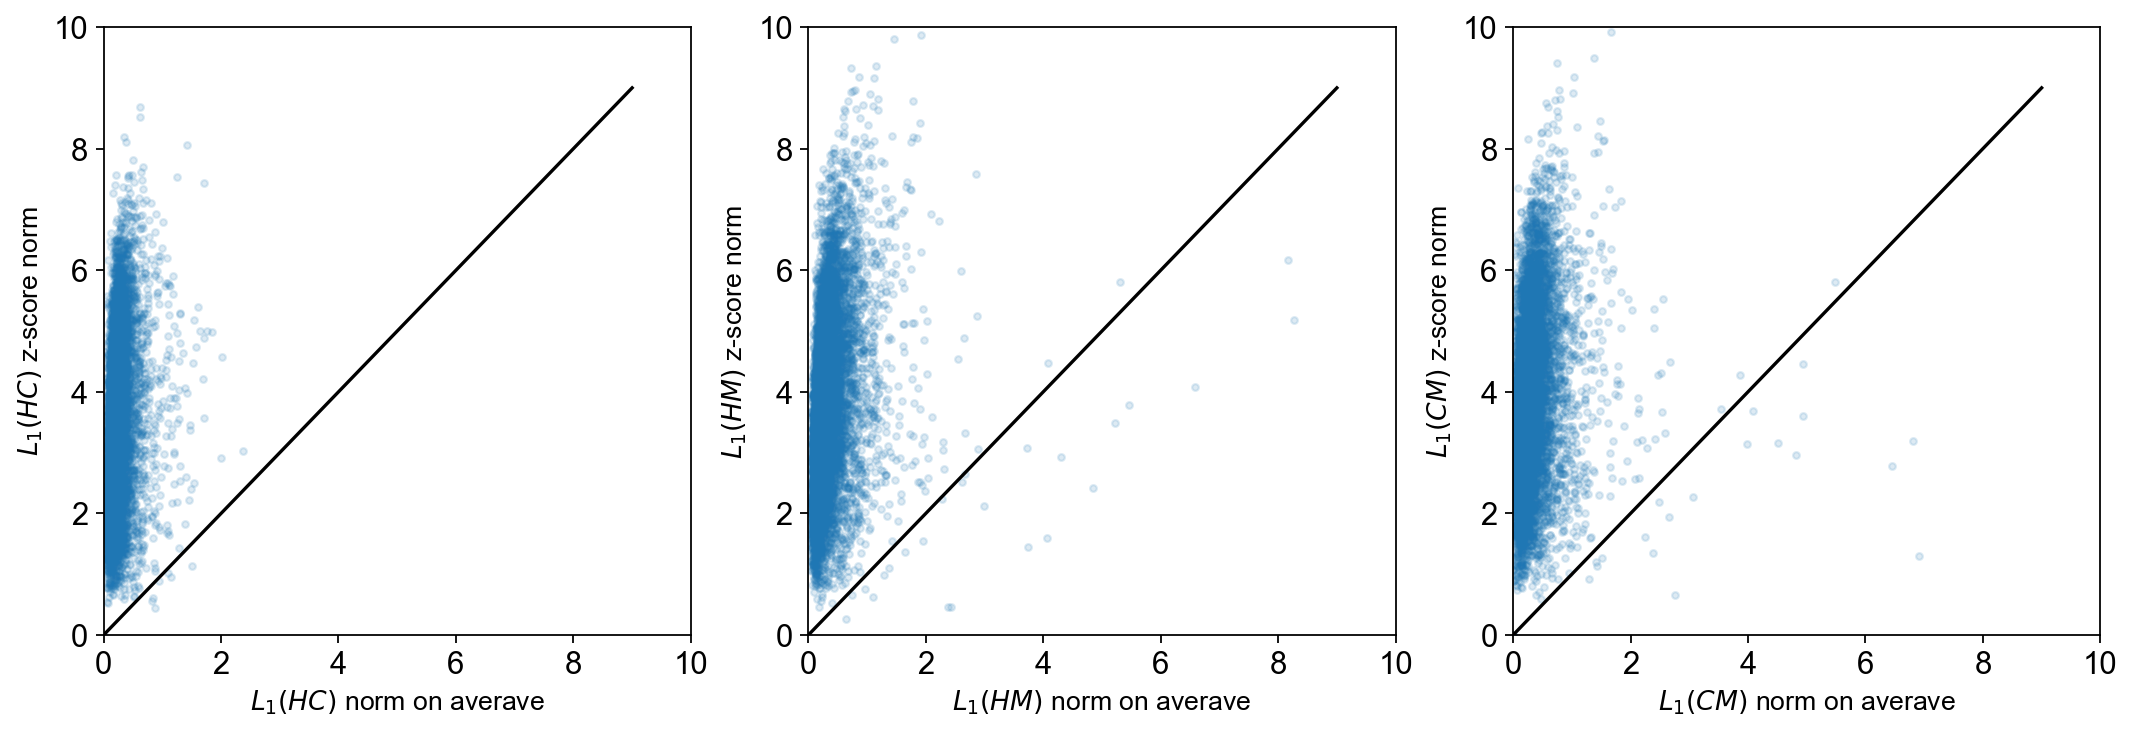

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
intersect = hc_l1_mean.index.intersection(hc_l1.index)

ax[0].plot(hc_l1_mean.loc[intersect], hc_l1.loc[intersect], '.', alpha=0.15)
ax[0].plot([0, 9], [0, 9], 'black')
#ax[0].set_title('Normalization on average')
ax[0].set_xlabel('$L_1(HC)$ norm on averave', fontsize=12)
ax[0].set_ylabel('$L_1(HC)$ z-score norm', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 10)

ax[1].plot(hm_l1_mean.loc[intersect], hm_l1.loc[intersect], '.', alpha=0.15)
ax[1].plot([0, 9], [0, 9], 'black')
#ax[1].set_title('Normalization on average')
ax[1].set_xlabel('$L_1(HM)$ norm on averave', fontsize=12)
ax[1].set_ylabel('$L_1(HM)$ z-score norm', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 10)

ax[2].plot(cm_l1_mean.loc[intersect], cm_l1.loc[intersect], '.', alpha=0.15)
ax[2].plot([0, 9], [0, 9], 'black')
#ax[2].set_title('Normalization on average')
ax[2].set_xlabel('$L_1(CM)$ norm on averave', fontsize=12)
ax[2].set_ylabel('$L_1(CM)$ z-score norm', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 10)
ax[2].set_ylim(0, 10)

(0.0, 8.0)

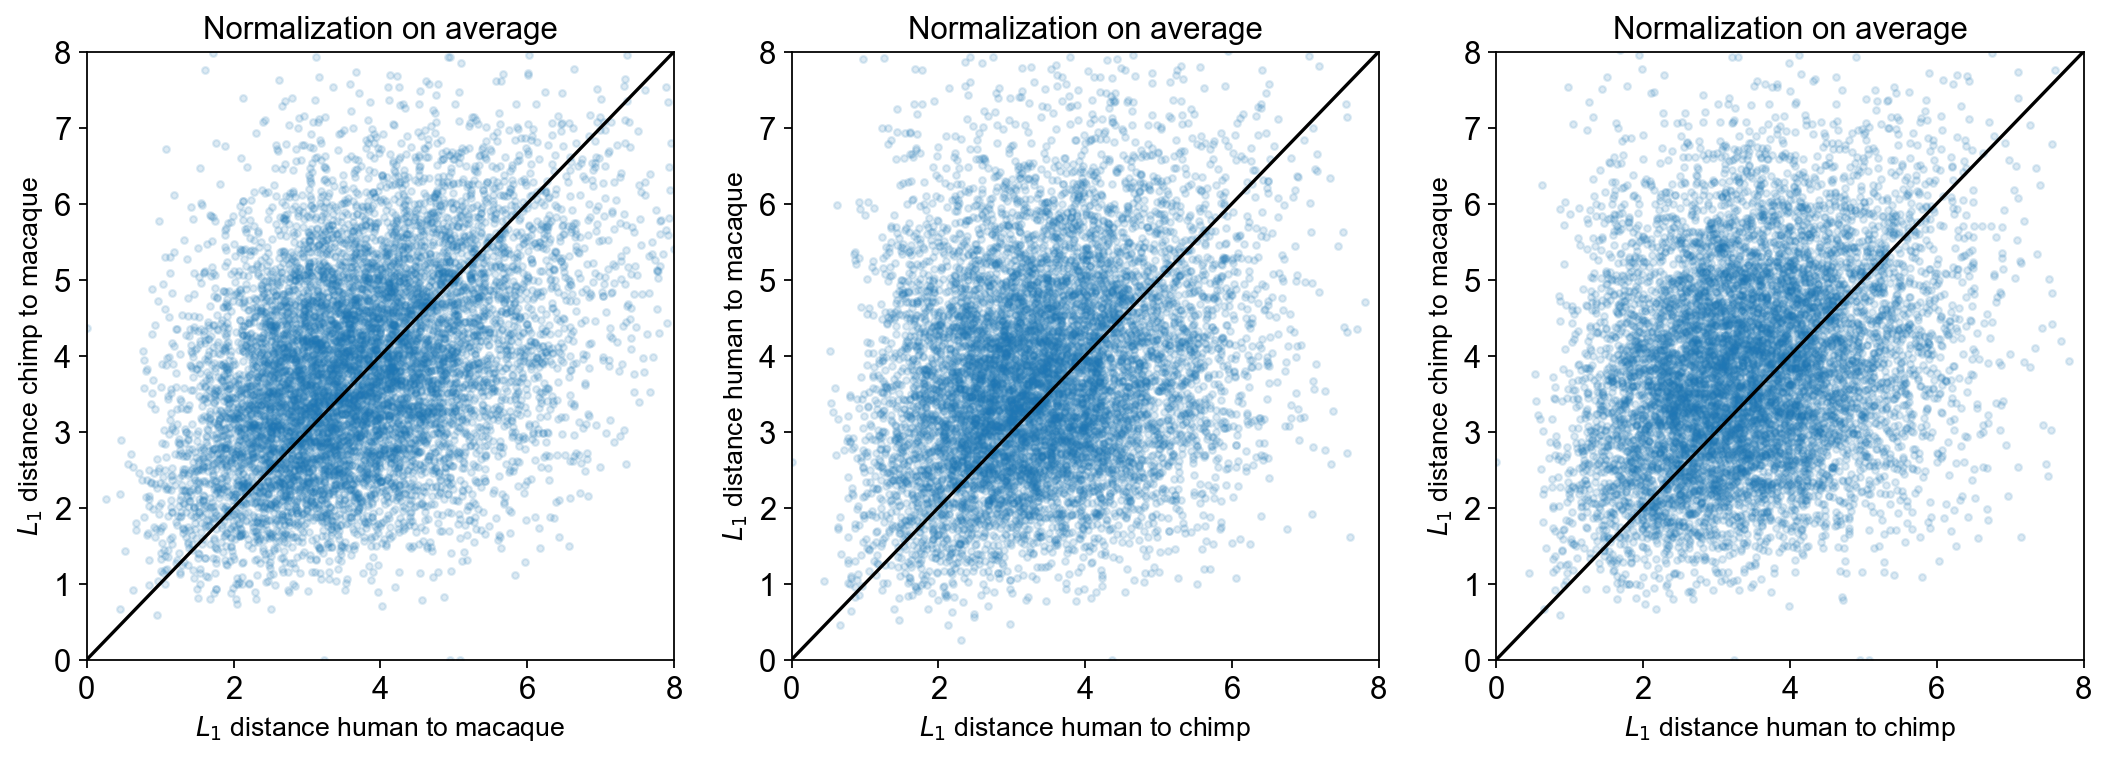

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(hm_l1, cm_l1, '.', alpha=0.15)
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 8)
ax[0].set_ylim(0, 8)

ax[1].plot(hc_l1, hm_l1, '.', alpha=0.15)
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 8)
ax[1].set_ylim(0, 8)

ax[2].plot(hc_l1, cm_l1, '.', alpha=0.15)
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Normalization on average')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 8)
ax[2].set_ylim(0, 8)

In [50]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(hm_l1, cm_l1, alpha=0.5, c=hc_l1, cmap='coolwarm')
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 8)
ax[0].set_ylim(0, 8)

ax[1].scatter(hc_l1, hm_l1, alpha=0.5, c=cm_l1, cmap='coolwarm')
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 8)
ax[1].set_ylim(0, 8)

ax[2].scatter(hc_l1, cm_l1, alpha=0.5, c=hm_l1, cmap='coolwarm')
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Normalization on average')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 8)
ax[2].set_ylim(0, 8)

(0.0, 8.0)

In [52]:
sns.histplot(cm_l1 - hm_l1)
plt.vlines(0, ymin=0, ymax=500, colors='black', linestyles='dashed')
plt.title('Normalization on average')
plt.xlabel('$L_1(CM) - L1(HM)$ ', fontsize=12)
plt.grid(False)

In [53]:
((cm_l1 - hm_l1) < 0).sum(), ((cm_l1 - hm_l1) > 0).sum()

(4719, 4488)

### Human-specific

Filter genes:
$$
L_1(HM) > L_1(CM)
$$

and

$$
L_1(HC) >= q
$$

In [54]:
quantile = 0.95
quant_value = hc_l1.quantile(quantile)
quant_value

0.5346945643424987

Text(0.5, 1.0, '$L_1$ distance human vs chimp')

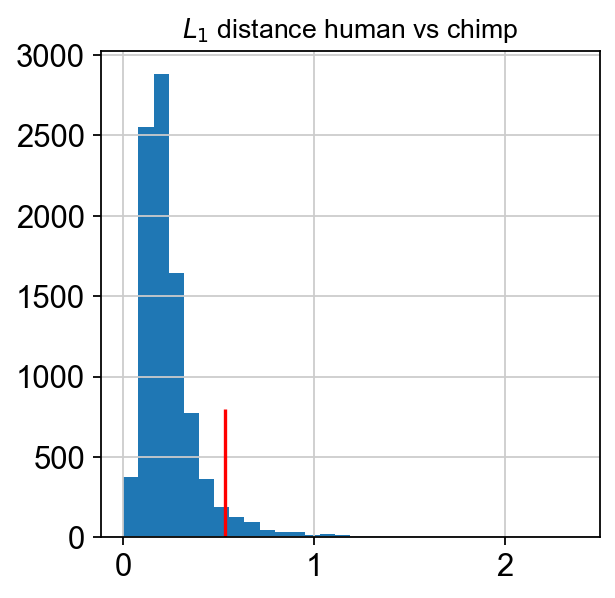

In [55]:
plt.vlines(quant_value, ymin=0, ymax=800,colors='red')
hc_l1.hist(bins=30)
plt.title('$L_1$ distance human vs chimp', fontsize=12)

In [56]:
gene_filter1 = (hm_l1 > cm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [57]:
hs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
hs_genes

Index(['KAZN', 'IGSF21', 'CAMK2N1', 'IFI6', 'GRIK3', 'POU3F1', 'SLC2A1',
       'SSBP3', 'DAB1', 'NEGR1',
       ...
       'RASL10A', 'SCUBE1', 'NRIP1', 'CXADR', 'NCAM2', 'JAM2', 'TTC3', 'PCP4',
       'COL18A1', 'S100B'],
      dtype='object', length=324)

### Chimp-specific

In [58]:
gene_filter1 = (cm_l1 > hm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [59]:
cs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
cs_genes

Index(['ID3', 'HPCA', 'NFIA', 'WLS', 'ST6GALNAC5', 'S1PR1', 'SLC16A1', 'TXNIP',
       'GLUL', 'RNF2',
       ...
       'TGFBR3L', 'SIRT2', 'TTC9B', 'PRKCG', 'RPS9', 'MIF', 'TIMP3', 'NPTXR',
       'FBLN1', 'MLC1'],
      dtype='object', length=137)

### Macaque-specific

In [60]:
gene_filter1 = (hm_l1 > hc_l1)
gene_filter2 = (cm_l1 >= quant_value)
gene_filter2.sum()

1164

In [61]:
ms_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
ms_genes

Index(['GNB1', 'GABRD', 'TMEM201', 'SRM', 'FBXO2', 'FBXO44', 'NPPA', 'PRDM2',
       'EFHD2', 'NECAP2',
       ...
       'BTG3', 'GRIK1', 'TIAM1', 'SYNJ1', 'PCP4', 'PFKL', 'CFAP410', 'PTTG1IP',
       'COL6A2', 'S100B'],
      dtype='object', length=997)

### Compare a number of human-specific vs chimp-specific

In [62]:
qv_list = np.linspace(0, 4, 100)
hs_num = []
cs_num = []
ms_num = []
quant_list = [0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999]
for qv in qv_list:
    #qv = hc_l1.quantile(q)
    # hs
    gene_filter1 = (hm_l1 > cm_l1)
    gene_filter2 = (hc_l1 >= qv)
    hs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # cs
    gene_filter1 = (cm_l1 > hm_l1)
    gene_filter2 = (hc_l1 >= qv)
    cs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # ms
    gene_filter1 = (hm_l1 > hc_l1)
    gene_filter2 = (cm_l1 >= qv)
    ms_num.append(hm_l1[(gene_filter1) & (gene_filter2)].index.size)

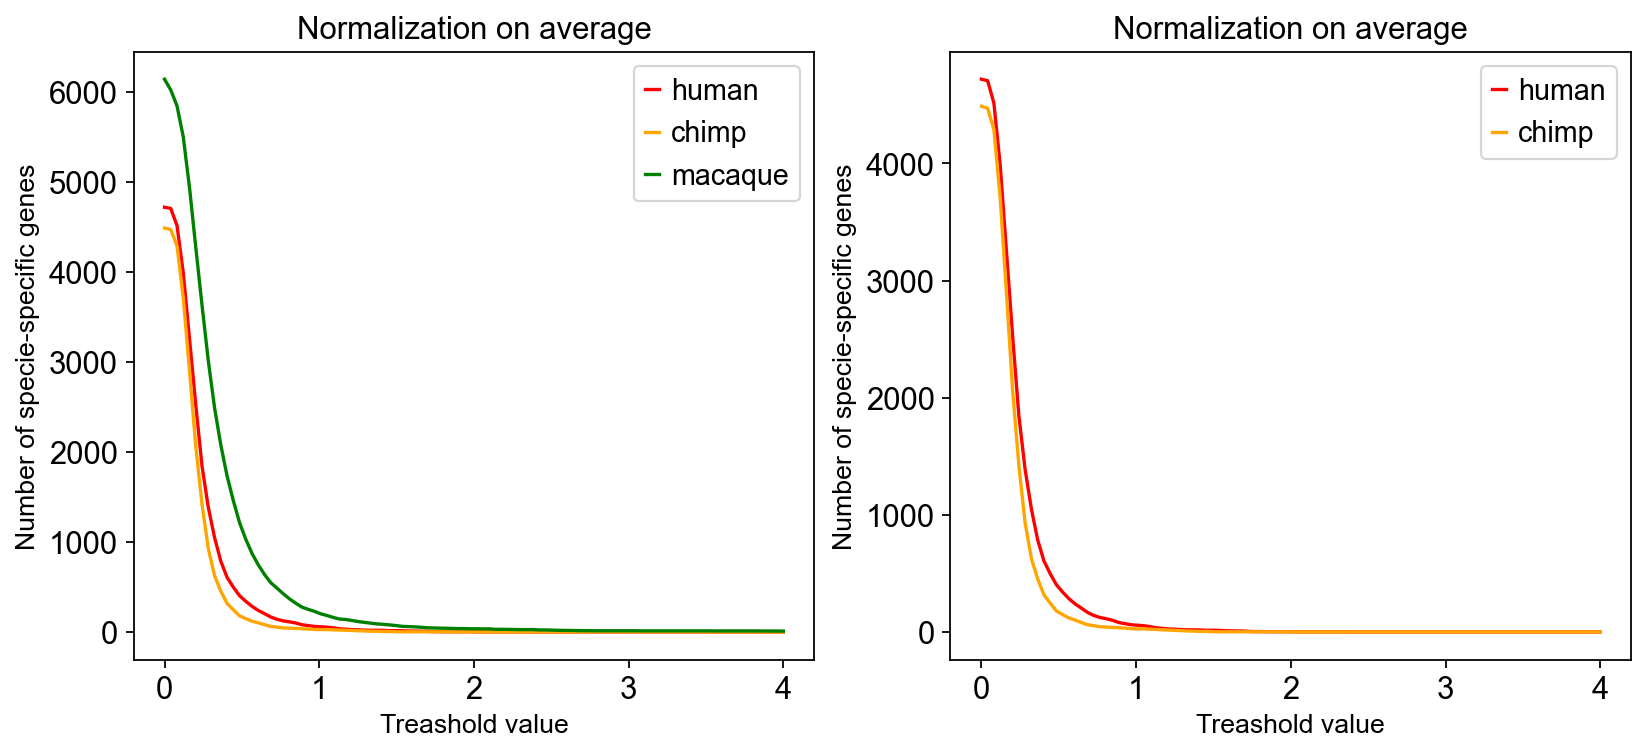

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(qv_list, hs_num, 'r-')
ax[0].plot(qv_list, cs_num, '-', c='orange')
ax[0].plot(qv_list, ms_num, '-', c='green')
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('Treashold value', fontsize=12)
ax[0].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[0].legend(['human', 'chimp', 'macaque'])
ax[0].grid(False)

ax[1].plot(qv_list, hs_num, 'r-')
ax[1].plot(qv_list, cs_num, '-', c='orange')
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('Treashold value', fontsize=12)
ax[1].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[1].legend(['human', 'chimp', 'macaque'])
ax[1].grid(False)

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

hs_num = np.array(hs_num)
cs_num = np.array(cs_num)
qv_list_num = np.array(qv_list)
nonzero = (hs_num != 0)
ratio = (hs_num[nonzero] - cs_num[nonzero]) / hs_num[nonzero]
ratio_loc_max_idx = ratio[:ratio.size // 2].argmax()
qv_loc_max = qv_list_num[ratio_loc_max_idx]
print(f'treshold = {qv_loc_max}')

ax[0].plot(qv_list, hs_num - cs_num, '-')
#ax[0].hlines(0, xmin=0, xmax=4, colors='black', linestyles='dashed', alpha=0.7)
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('Treashold value', fontsize=12)
ax[0].set_ylabel('$N_{hs} - N_{cs}$', fontsize=12)
ax[0].grid(False)

ax[1].plot(qv_list_num[nonzero], ratio, '-')
ax[1].plot([qv_loc_max], [ratio[ratio_loc_max_idx]], 'ro')
ax[1].text(qv_loc_max - 0.3, ratio[ratio_loc_max_idx] + 0.05, f'({qv_loc_max: .2f}, {ratio[ratio_loc_max_idx]: .2f})', fontsize=12)
#ax[1].hlines(0, xmin=0, xmax=qv_list_num[nonzero].max(), colors='black', linestyles='dashed', alpha=0.7)
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('Treashold value', fontsize=12)
ax[1].set_ylabel('$(N_{hs} - N_{cs}) / N_{hs}$', fontsize=12)
ax[1].grid(False)

ax[2].plot(hs_num[nonzero], ratio, '-')
ax[2].plot([hs_num[ratio_loc_max_idx]], [ratio[ratio_loc_max_idx]], 'ro')
ax[2].text(hs_num[ratio_loc_max_idx] - 50, ratio[ratio_loc_max_idx] + 0.05, f'({hs_num[ratio_loc_max_idx]}, {ratio[ratio_loc_max_idx]: .2f})', fontsize=12)
#ax[2].hlines(0, xmin=0, xmax=qv_list_num[nonzero].max(), colors='black', linestyles='dashed', alpha=0.7)
ax[2].set_title('Normalization on average')
ax[2].set_xlabel('N_{hs}', fontsize=12)
ax[2].set_ylabel('$(N_{hs} - N_{cs}) / N_{hs}$', fontsize=12)
ax[2].set_xlim(-50, 1000)
ax[2].grid(False)

treshold = 0.7676767676767677


In [77]:
ratio

array([ 0.05147059,  0.05256095,  0.05244755,  0.07545136,  0.1223716 ,
        0.22475728,  0.29971791,  0.4919268 ,  0.67891374,  0.73348018,
        0.9148265 ,  1.02439024,  1.25139665,  1.2972973 ,  1.38655462,
        1.36633663,  1.5375    ,  1.72131148,  1.64150943,  1.79545455,
        1.66666667,  1.60526316,  1.22222222,  1.1875    ,  1.25925926,
        1.19230769,  1.03846154,  0.95652174,  0.66666667,  0.66666667,
        0.5625    ,  0.76923077,  0.81818182,  1.25      ,  1.57142857,
        2.4       ,  1.8       ,  6.        , 12.        ,  9.        ,
        8.        ,  7.        ,  6.        ,  3.        ,  2.        ,
        2.        ,  1.        ,  1.        ,  1.        ,  1.        ])

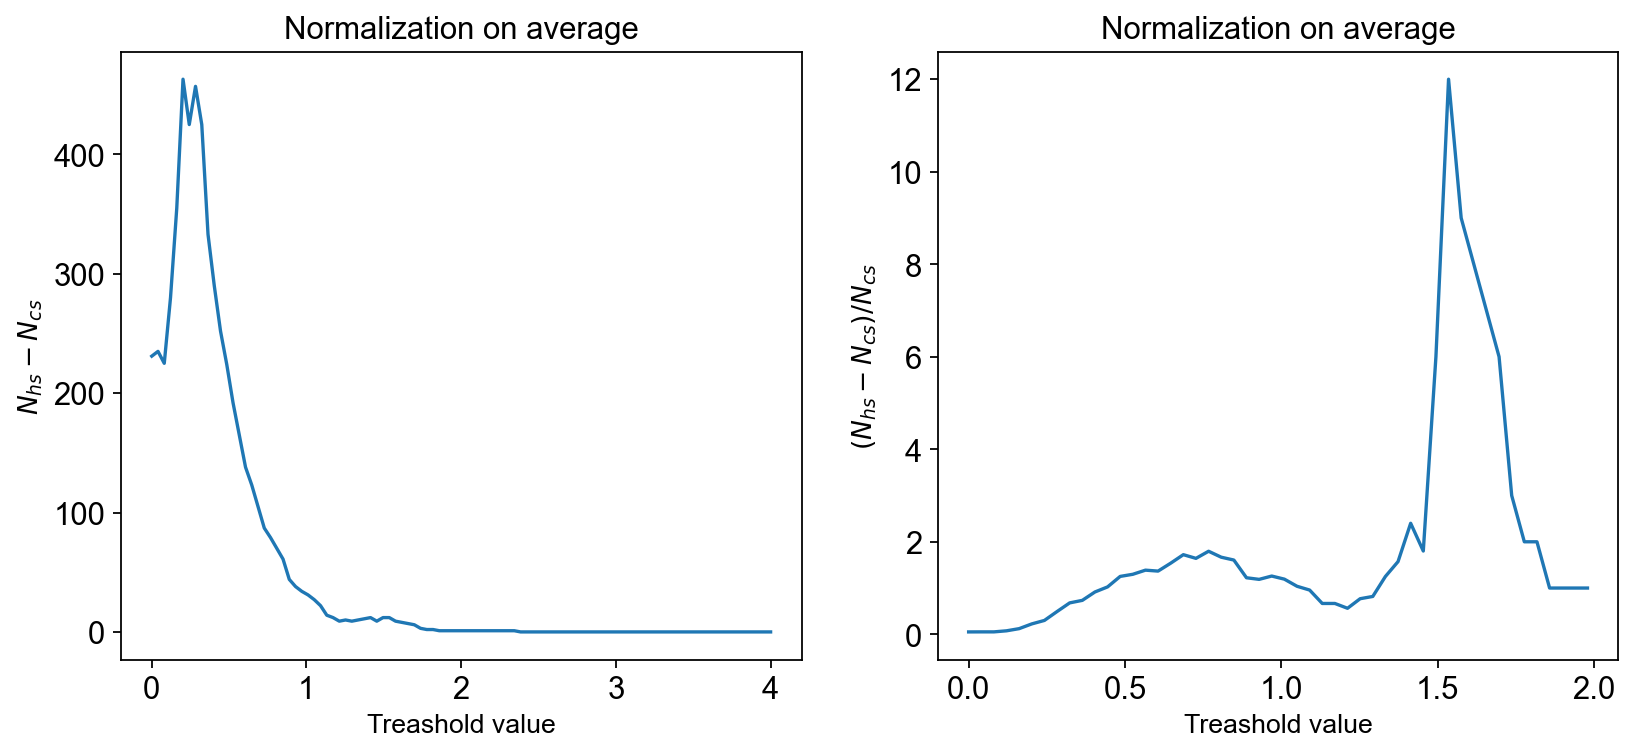

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

hs_num = np.array(hs_num)
cs_num = np.array(cs_num)
qv_list_num = np.array(qv_list)
nonzero = (cs_num != 0)
ratio = (hs_num[nonzero] - cs_num[nonzero]) / cs_num[nonzero]
#ratio_loc_max_idx = ratio[:ratio.size // 2].argmax()
#qv_loc_max = qv_list_num[ratio_loc_max_idx]
#print(f'treshold = {qv_loc_max}')

ax[0].plot(qv_list, hs_num - cs_num, '-')
#ax[0].hlines(0, xmin=0, xmax=4, colors='black', linestyles='dashed', alpha=0.7)
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('Treashold value', fontsize=12)
ax[0].set_ylabel('$N_{hs} - N_{cs}$', fontsize=12)
ax[0].grid(False)

ax[1].plot(qv_list_num[nonzero], ratio, '-')
#ax[1].plot([qv_loc_max], [ratio[ratio_loc_max_idx]], 'ro')
#ax[1].text(qv_loc_max - 0.3, ratio[ratio_loc_max_idx] + 0.05, f'({qv_loc_max: .2f}, {ratio[ratio_loc_max_idx]: .2f})', fontsize=12)
#ax[1].hlines(0, xmin=0, xmax=qv_list_num[nonzero].max(), colors='black', linestyles='dashed', alpha=0.7)
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('Treashold value', fontsize=12)
ax[1].set_ylabel('$(N_{hs} - N_{cs}) / N_{сs}$', fontsize=12)
ax[1].grid(False)

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

hs_num = np.array(hs_num)
cs_num = np.array(cs_num)
qv_list_num = np.array(qv_list)
nonzero = (cs_num != 0)
ratio = hs_num[nonzero] / cs_num[nonzero]
#ratio_loc_max_idx = ratio[:ratio.size // 2].argmax()
#qv_loc_max = qv_list_num[ratio_loc_max_idx]
#print(f'treshold = {qv_loc_max}')

ax[0].plot(qv_list, hs_num - cs_num, '-')
#ax[0].hlines(0, xmin=0, xmax=4, colors='black', linestyles='dashed', alpha=0.7)
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('Treashold value', fontsize=12)
ax[0].set_ylabel('$N_{hs} - N_{cs}$', fontsize=12)
ax[0].grid(False)

ax[1].plot(qv_list_num[nonzero], ratio, '-')
#ax[1].plot([qv_loc_max], [ratio[ratio_loc_max_idx]], 'ro')
#ax[1].text(qv_loc_max - 0.3, ratio[ratio_loc_max_idx] + 0.05, f'({qv_loc_max: .2f}, {ratio[ratio_loc_max_idx]: .2f})', fontsize=12)
#ax[1].hlines(0, xmin=0, xmax=qv_list_num[nonzero].max(), colors='black', linestyles='dashed', alpha=0.7)
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('Treashold value', fontsize=12)
ax[1].set_ylabel('$N_{hs}/ N_{cs}$', fontsize=12)
ax[1].grid(False)

In [74]:
argmax = ratio[:ratio.size // 2].argmax()
qv_list_num[argmax]

0.7676767676767677

In [71]:
diff = hs_num - cs_num
hs_num[(diff == 457)], cs_num[(diff == 457)]

(array([1386]), array([929]))

## Explore specie-specific genes

### Apply treashold

#### Human-specific

In [64]:
quant_value = qv_loc_max

In [65]:
gene_filter1 = (hm_l1 > cm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

167

In [66]:
hs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
hs_genes

Index(['IGSF21', 'IFI6', 'GRIK3', 'SSBP3', 'DAB1', 'NEGR1', 'SYT6', 'MAN1A2',
       'RGS4', 'DNM3',
       ...
       'SSTR2', 'MBP', 'SLC17A7', 'ETFB', 'GRK3', 'SCUBE1', 'NRIP1', 'NCAM2',
       'TTC3', 'PCP4'],
      dtype='object', length=123)

#### Chimp-specific

In [67]:
gene_filter1 = (cm_l1 > hm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

167

In [68]:
cs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
cs_genes, cs_genes.size

(Index(['ID3', 'NFIA', 'GLUL', 'B3GALT2', 'AGT', 'ACTN2', 'RPRM', 'NR4A2',
        'IGFBP5', 'SNORC', 'CLEC3B', 'EPHA3', 'MASP1', 'SST', 'RASL11B', 'SPP1',
        'MCUB', 'CXCL14', 'SPARC', 'WASF1', 'QKI', 'ETV1', 'NEUROD6', 'DYNC1I1',
        'TSC22D4', 'RELN', 'ITM2A', 'SULF1', 'SPON1', 'NELL1', 'SLC1A2',
        'GRIA4', 'CRYAB', 'CYP26A1', 'MOAP1', 'THBS1', 'SV2B', 'CALB2', 'NPTX1',
        'CELF4', 'CBLN2', 'ID1', 'TIMP3', 'MLC1'],
       dtype='object'),
 44)

#### Macaque-specific

In [69]:
gene_filter1 = (hm_l1 > hc_l1)
gene_filter2 = (cm_l1 >= quant_value)
gene_filter2.sum()

480

In [70]:
ms_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
ms_genes

Index(['GABRD', 'FBXO2', 'NPPA', 'PADI2', 'CAMK2N1', 'ID3', 'CLIC4',
       'MARCKSL1', 'HPCA', 'MED8',
       ...
       'AIFM3', 'MN1', 'SOX10', 'CBX6', 'SYNGR1', 'FBLN1', 'GRIK1', 'PCP4',
       'COL6A2', 'S100B'],
      dtype='object', length=424)

### Cluster genes

In [82]:
df = pd.DataFrame(adata_pb_norm_mean.X, index=adata_pb_norm_mean.obs_names, columns=adata_pb_norm_mean.var_names)
df.head()

NOC2L      HES4      AGRN      SDF4   B3GALT6    UBE2J2  \
WM.human_759 -0.029434  0.000060 -0.043513 -0.047352  0.019730  0.073377   
L5.human_759  0.041378 -0.070859  0.081056 -0.035505  0.081751  0.024801   
L2.human_759  0.003540  0.078116 -0.094614  0.048347 -0.015289 -0.041880   
L3.human_759  0.014209  0.003650  0.055936 -0.024306 -0.030928 -0.005821   
L1.human_759 -0.084783  0.076086 -0.060492  0.055313 -0.022007 -0.051856   

                SCNN1D     ACAP3     PUSL1    INTS11  ...   SLC19A1    COL6A2  \
WM.human_759 -0.025426  0.066394 -0.005994  0.083730  ... -0.024605 -0.030153   
L5.human_759 -0.044137 -0.004835  0.042257 -0.097683  ...  0.050453  0.024884   
L2.human_759  0.051197 -0.011478 -0.012885  0.011412  ... -0.101996 -0.067572   
L3.human_759 -0.020386 -0.024487  0.006003  0.040760  ...  0.006111 -0.036663   
L1.human_759 -0.003284 -0.015899 -0.068717  0.025030  ...  0.063681  0.174612   

               SPATC1L       LSS    MCM3AP      YBEY      PCNT     DIP2A  \
WM.human_759  0.062796  0.006477  0.006101 -0.060417  0.043866  0.194249   
L5.human_759  0.031172 -0.011941  0.004423  0.048610  0.010844 -0.003836   
L2.human_759  0.010210 -0.086683 -0.034970  0.014981 -0.022672 -0.073343   
L3.human_759 -0.056161 -0.006650  0.039214 -0.016340 -0.015449 -0.077759   
L1.human_759 -0.047302  0.132038 -0.019618  0.023529  0.050175  0.009793   

                 S100B     PRMT2  
WM.human_759 -0.013059  0.086238  
L5.human_759 -0.163151 -0.036175  
L2.human_759 -0.099143  0.033223  
L3.human_759 -0.158493 -0.059132  
L1.human_759  0.679210  0.060245  

[5 rows x 9208 columns]

In [83]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df.loc[df.index.str.contains(cond)].index
    order = samples.sort_values()
    order_laminar = order[order.str.contains('L')].tolist()
    order_wm = order[order.str.contains('WM')].tolist()
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df = df.loc[sample_order['all']]

### Human

#### Hierarchial clustering

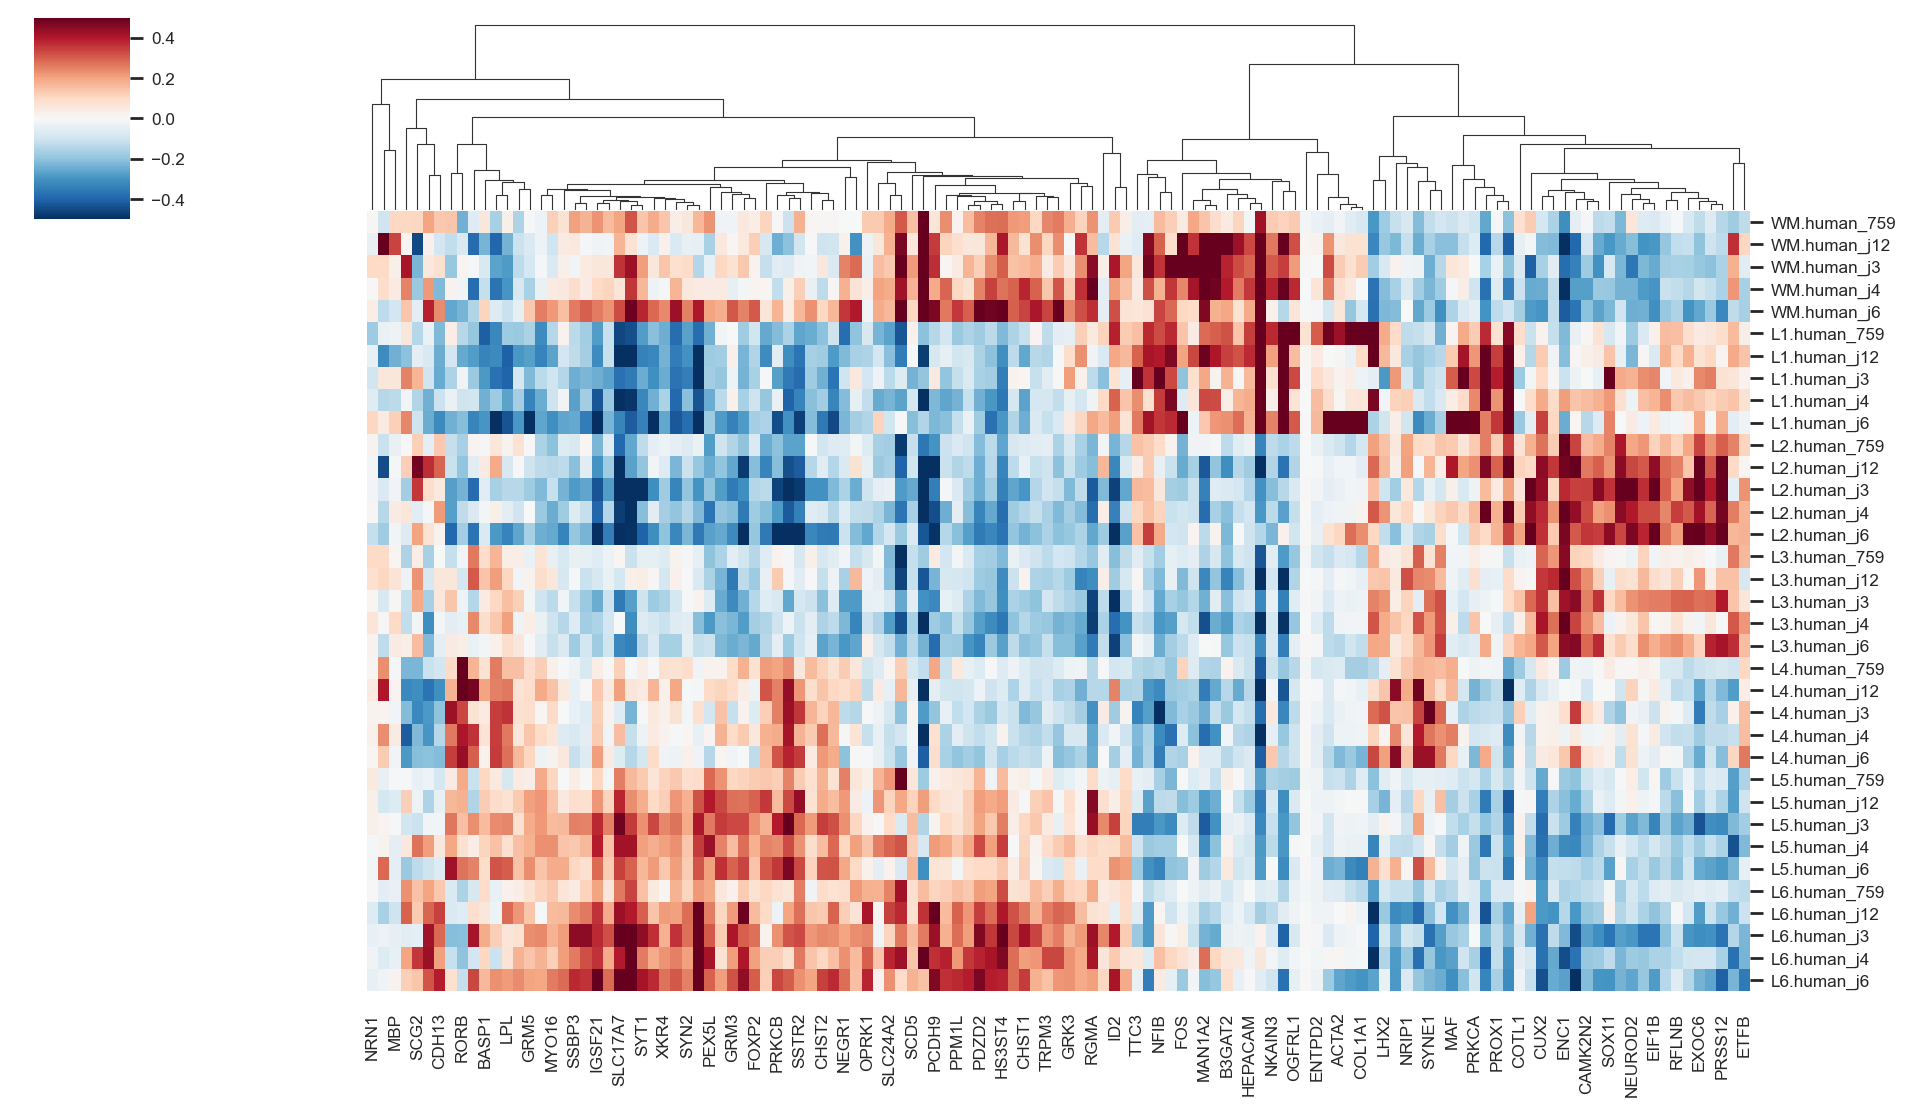

In [99]:
sns.set(font_scale=0.7)
clustergrid = sns.clustermap(df[hs_genes].loc[sample_order['human']], figsize=(12, 7), cmap="RdBu_r", center=0, vmax=0.5, vmin=-0.5, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

<Axes: >

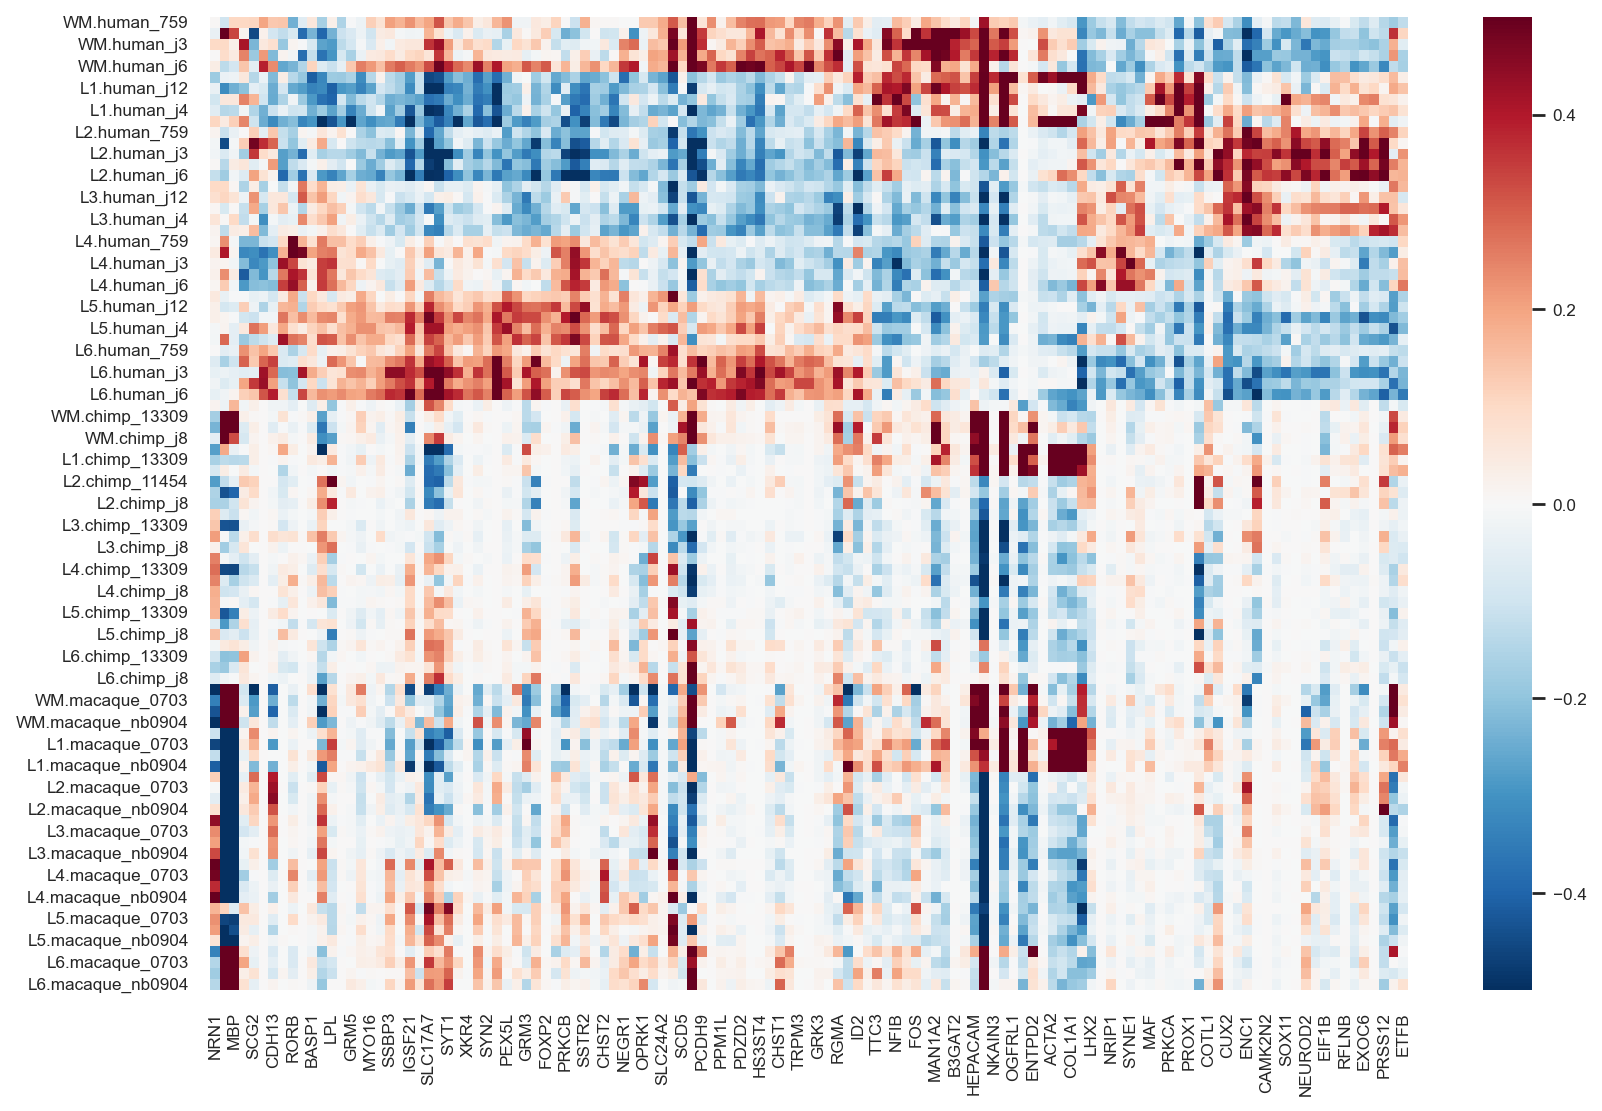

In [100]:
#sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(12, 8))
reordered_genes = clustergrid.dendrogram_col.reordered_ind
gene_order = hs_genes[reordered_genes]
sns.heatmap(df[gene_order], ax=ax, cmap="RdBu_r", vmax=0.5, vmin=-0.5, center=0)

In [101]:
sns.set(font_scale=0.7)
clustergrid = sns.clustermap(df[hs_genes], figsize=(15, 10), cmap="RdBu_r", center=0, vmax=0.5, vmin=-0.5, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

d:\projects\diploma\venv_stats2\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


#### Spectral clustering

In [102]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
aff_matrix = pairwise_kernels(df[hs_genes].loc[sample_order['human']].T, metric='cosine') + 1
n_clusters = 4
clustering = SpectralClustering(n_clusters=n_clusters, gamma=1, affinity='precomputed', random_state=4)
clustering.fit(aff_matrix)

SpectralClustering(affinity='precomputed', gamma=1, n_clusters=4,
                   random_state=4)

In [103]:
labels = pd.Series(clustering.labels_, index=hs_genes).sort_values()
order = labels.sort_values().index

<Axes: >

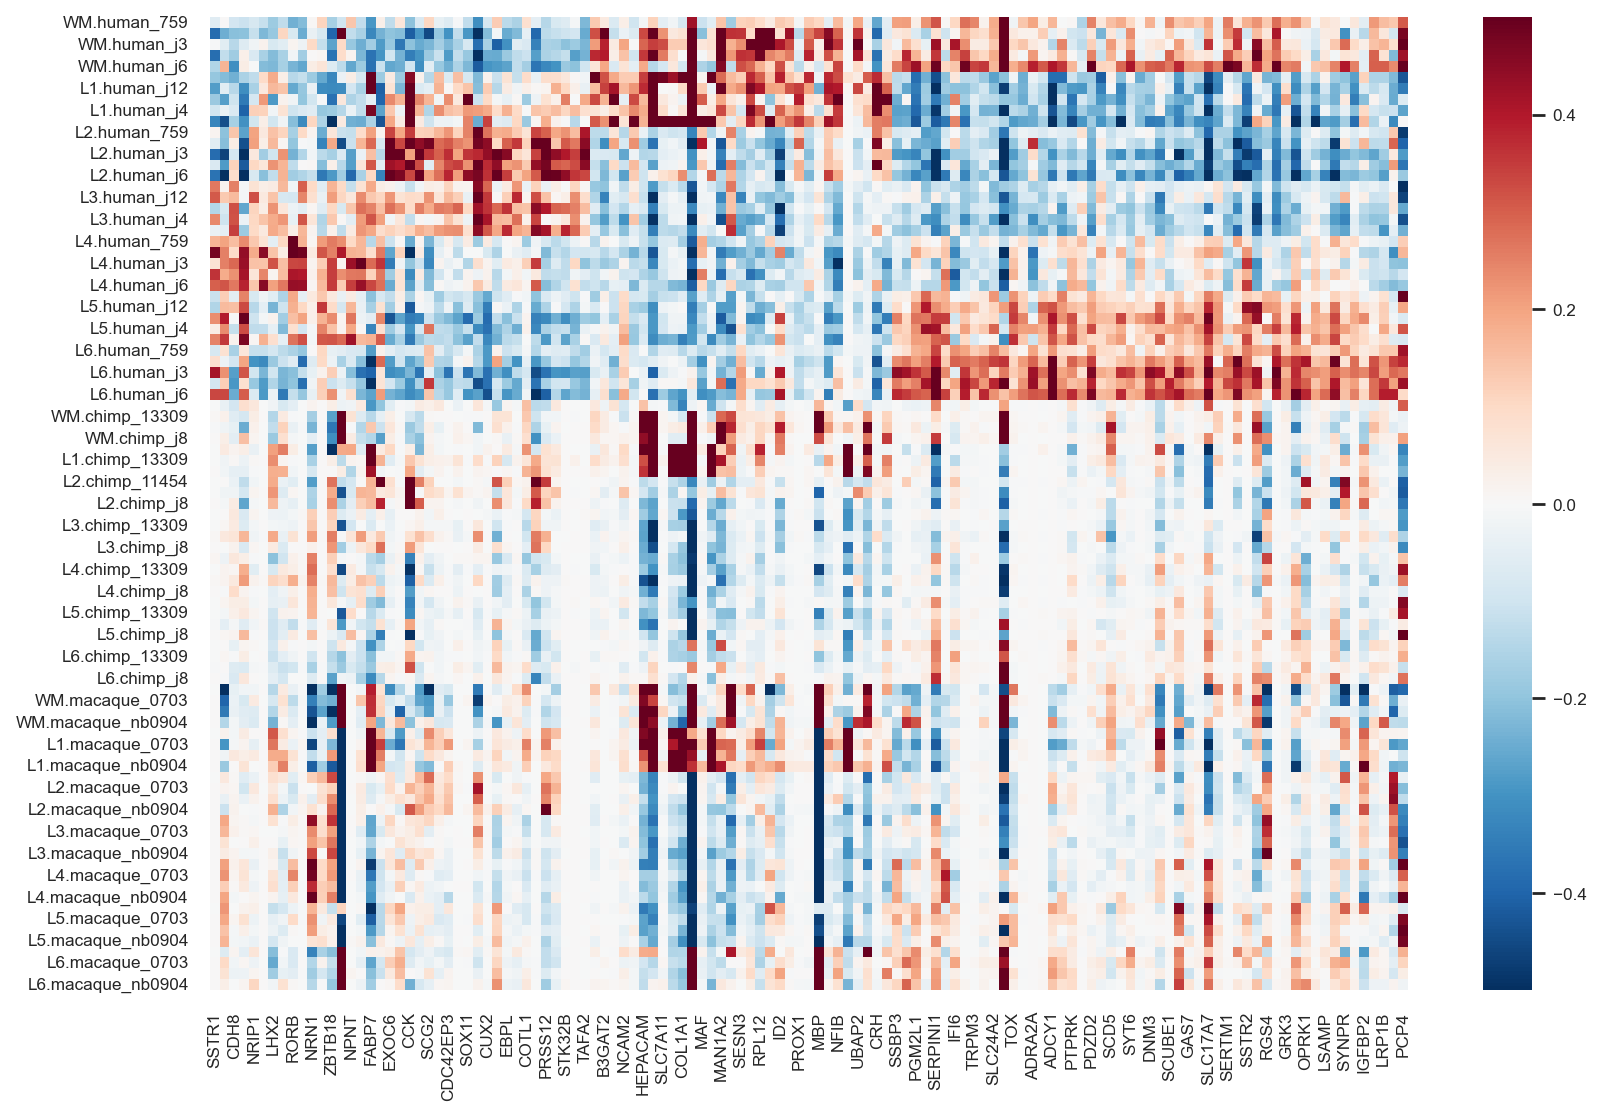

In [104]:
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.loc[sample_order['all'], order], ax=ax, cmap="RdBu_r", vmax=0.5, vmin=-0.5, center=0)

In [105]:
df_annotation = df[hs_genes].copy()
df_annotation['layer'] = adata_pb_norm_mean.obs.layer
df_annotation['condition'] = adata_pb_norm_mean.obs.condition

In [106]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

IGSF21      IFI6     GRIK3     SSBP3      DAB1     NEGR1  \
condition layer                                                               
chimp     L1    -0.170372 -0.034785 -0.010471 -0.002194  0.010024 -0.006724   
          L2    -0.106329  0.080246 -0.002373 -0.006115  0.029499 -0.006568   
          L3    -0.017973  0.016376 -0.008614 -0.007944  0.010304 -0.000181   
          L4     0.142036 -0.095827 -0.005589  0.010349 -0.004430  0.002340   
          L5     0.155632 -0.008999  0.001327  0.005843 -0.019621 -0.001013   

                     SYT6    MAN1A2      RGS4      DNM3  ...     SSTR2  \
condition layer                                          ...             
chimp     L1    -0.007645  0.225271 -0.186101  0.010853  ... -0.000622   
          L2     0.000453 -0.043890 -0.248340 -0.005756  ... -0.000622   
          L3    -0.013752 -0.211148  0.074303 -0.014904  ... -0.005372   
          L4    -0.005670 -0.239615  0.167778 -0.024864  ...  0.010034   
          L5     0.001203 -0.101498  0.137853 -0.002541  ... -0.005106   

                      MBP   SLC17A7      ETFB      GRK3    SCUBE1     NRIP1  \
condition layer                                                               
chimp     L1    -0.059311 -0.434409  0.148219 -0.008621 -0.000401 -0.011897   
          L2    -0.181467 -0.351992 -0.040344 -0.020414 -0.018027 -0.003694   
          L3    -0.191508 -0.036281 -0.038414  0.000487 -0.024141 -0.003605   
          L4    -0.190633  0.115215  0.004832 -0.012818 -0.028680 -0.010834   
          L5    -0.134189  0.160074 -0.031816 -0.008305  0.009625 -0.005864   

                    NCAM2      TTC3      PCP4  
condition layer                                
chimp     L1     0.068495  0.146501 -0.279652  
          L2     0.030706 -0.025526 -0.395507  
          L3    -0.006989 -0.097487 -0.262731  
          L4    -0.003119 -0.118147  0.188136  
          L5    -0.013320 -0.079551  0.355865  

[5 rows x 123 columns]

In [107]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')